# Imports 

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
plt.style.use('ggplot') #https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
%matplotlib inline

# Get the data

In [183]:
data_bench = pd.read_pickle("data/course_and_uni_1819.pkl")
data_covid = pd.read_pickle("data/course_and_uni_2122.pkl")

In [184]:
#drop not needed columns - no point in keeping uni and course as we don't have future data (duh)
data_bench.drop(["uni","course"],inplace = True, axis = "columns")
data_covid.drop(["uni","course"], inplace = True, axis = "columns")

<AxesSubplot: title={'center': '2021-2022'}>

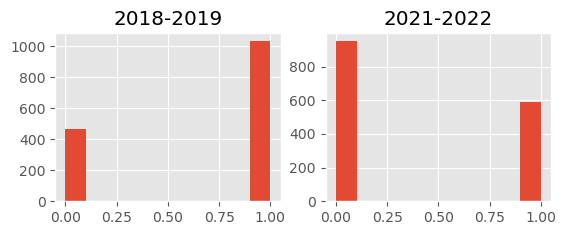

In [185]:
data_bench.Q27 = data_bench.Q27.apply(lambda x: 1 if x >= 0.8 else 0)
plt.subplot(2,2,1)
plt.title("2018-2019")
data_bench.Q27.hist()

data_covid.Q27 = data_covid.Q27.apply(lambda x: 1 if x >= 0.8 else 0)
plt.subplot(2,2,2)
plt.title("2021-2022")
data_covid.Q27.hist()

In [186]:
from sklearn.model_selection import train_test_split
x_train_bench, x_test_bench, y_train_bench, y_test_bench = train_test_split(data_bench.iloc[:,:26], data_bench.iloc[:,26], test_size=0.25, stratify= data_bench.iloc[:,26], shuffle = True, random_state=661)
x_train_covid, x_test_covid, y_train_covid, y_test_covid = train_test_split(data_covid.iloc[:,:26], data_covid.iloc[:,26], test_size=0.25, stratify = data_covid.iloc[:,26], shuffle = True, random_state=661)

# Algorithms

In [202]:
def get_scores(clf, x_test, y_test):
    preds = clf.predict(x_test)
    acc = clf.score(x_test, y_test)
    print("Accuracy: ", acc)
    print("F1 score: ", f1_score(y_test, preds))
    scores = cross_val_score(clf, x_test, y_test, cv=10)
    print(f"{scores.mean():.2f} CV accuracy with a standard deviation of {scores.std():.2f}")
    
    cm = metrics.confusion_matrix(y_test, preds)
    print(cm)
    sns.heatmap(cm, annot=True)

#### Logistic regression 

Accuracy:  0.8826666666666667
F1 score:  0.9172932330827068
0.88 CV accuracy with a standard deviation of 0.05
[[ 87  30]
 [ 14 244]]


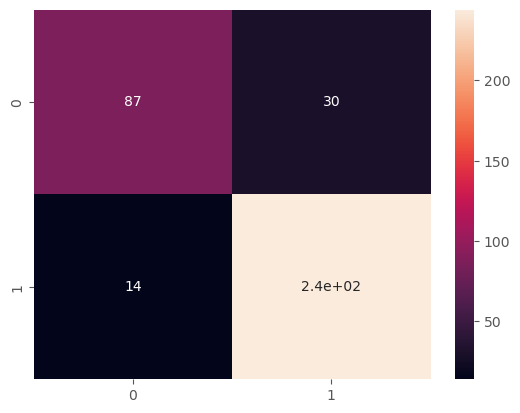

In [203]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_bench, y_train_bench)

#get metrics
get_scores(logreg, x_test_bench, y_test_bench)

#### Decision tree

Accuracy:  0.824
F1 score:  0.872093023255814
0.81 CV accuracy with a standard deviation of 0.08
[[ 84  33]
 [ 33 225]]


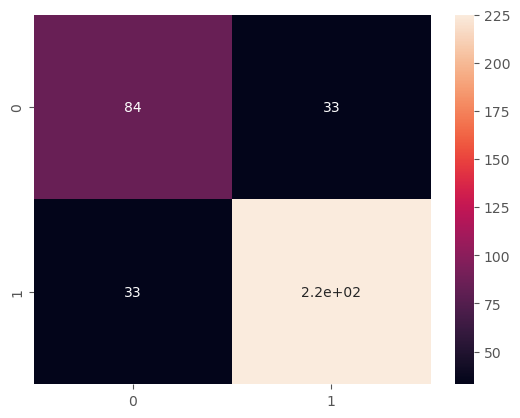

In [221]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train_bench, y_train_bench)

get_scores(dtree, x_test_bench, y_test_bench)

In [229]:
#saving dtree for corr analysis
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("dtree") 

'dtree.pdf'

#### Random forest

Accuracy:  0.8666666666666667
F1 score:  0.9045801526717557
0.87 CV accuracy with a standard deviation of 0.06
[[ 88  29]
 [ 21 237]]


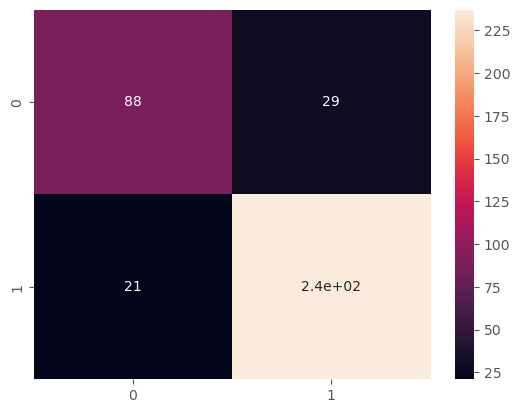

In [231]:
from sklearn.ensemble import RandomForestClassifier
rfor = RandomForestClassifier()
rfor.fit(x_train_bench, y_train_bench)

get_scores(rfor, x_test_bench, y_test_bench)

#### Artificial neural network